In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Preparation

In [2]:
df=pd.read_csv('medical.csv ')
df

Patient ID  Age  Pregnancies  Glucose  BloodPressure  SkinThickness  \
0             1   50            6      148             72             35   
1             2   31            1       85             66             29   
2             3   32            8      183             64              0   
3             4   21            1       89             66             23   
4             5   33            0      137             40             35   
..          ...  ...          ...      ...            ...            ...   
763         764   63           10      101             76             48   
764         765   27            2      122             70             27   
765         766   30            5      121             72             23   
766         767   47            1      126             60              0   
767         768   23            1       93             70             31   

     Insulin   BMI  DiabetesPedigreeFunction  Outcome  
0          0  33.6                     0.627        1  
1          0  26.6                     0.351        0  
2          0  23.3                     0.672        1  
3         94  28.1                     0.167        0  
4        168  43.1                     2.288        1  
..       ...   ...                       ...      ...  
763      180  32.9                     0.171        0  
764        0  36.8                     0.340        0  
765      112  26.2                     0.245        0  
766        0  30.1                     0.349        1  
767        0  30.4                     0.315        0  

[768 rows x 10 columns]

In [4]:
data=df.drop('Patient ID',axis=1)

In [5]:
#Replacing the 0's in these specified columns with the 'average'(because BMI,Bloodpressure,.... can't be zero)
no_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in no_zeroes:
    mean_value = data[column][data[column] != 0].mean() # calculates mean of all values of 'column' excluding all zeros
    data[column] = data[column].replace(0, mean_value) # replace 0's with mean
    
print(data)

     Age  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0     50            6    148.0           72.0       35.00000  155.548223   
1     31            1     85.0           66.0       29.00000  155.548223   
2     32            8    183.0           64.0       29.15342  155.548223   
3     21            1     89.0           66.0       23.00000   94.000000   
4     33            0    137.0           40.0       35.00000  168.000000   
..   ...          ...      ...            ...            ...         ...   
763   63           10    101.0           76.0       48.00000  180.000000   
764   27            2    122.0           70.0       27.00000  155.548223   
765   30            5    121.0           72.0       23.00000  112.000000   
766   47            1    126.0           60.0       29.15342  155.548223   
767   23            1     93.0           70.0       31.00000  155.548223   

      BMI  DiabetesPedigreeFunction  Outcome  
0    33.6                     0.627     

In [6]:
data.head()

Age  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0   50            6    148.0           72.0       35.00000  155.548223  33.6   
1   31            1     85.0           66.0       29.00000  155.548223  26.6   
2   32            8    183.0           64.0       29.15342  155.548223  23.3   
3   21            1     89.0           66.0       23.00000   94.000000  28.1   
4   33            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Outcome  
0                     0.627        1  
1                     0.351        0  
2                     0.672        1  
3                     0.167        0  
4                     2.288        1

In [7]:
data.tail(10)

Age  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
758   26            1    106.0           76.0       29.15342  155.548223   
759   66            6    190.0           92.0       29.15342  155.548223   
760   22            2     88.0           58.0       26.00000   16.000000   
761   43            9    170.0           74.0       31.00000  155.548223   
762   33            9     89.0           62.0       29.15342  155.548223   
763   63           10    101.0           76.0       48.00000  180.000000   
764   27            2    122.0           70.0       27.00000  155.548223   
765   30            5    121.0           72.0       23.00000  112.000000   
766   47            1    126.0           60.0       29.15342  155.548223   
767   23            1     93.0           70.0       31.00000  155.548223   

      BMI  DiabetesPedigreeFunction  Outcome  
758  37.5                     0.197        0  
759  35.5                     0.278        1  
760  28.4                     0.766        0  
761  44.0                     0.403        1  
762  22.5                     0.142        0  
763  32.9                     0.171        0  
764  36.8                     0.340        0  
765  26.2                     0.245        0  
766  30.1                     0.349        1  
767  30.4                     0.315        0

# EDA(Exploratory data analysis)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

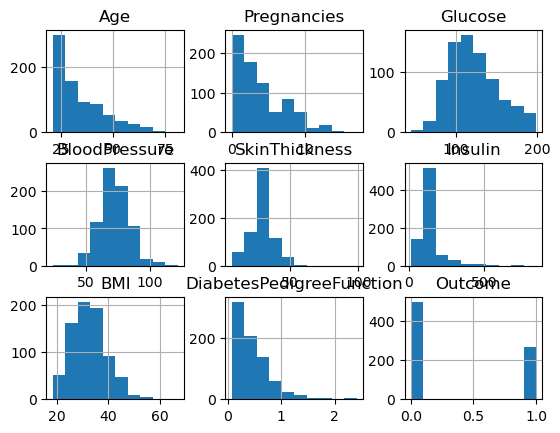

In [8]:
data.hist()

In [9]:
data.describe()

Age  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean    33.240885     3.845052  121.686763      72.405184      29.153420   
std     11.760232     3.369578   30.435949      12.096346       8.790942   
min     21.000000     0.000000   44.000000      24.000000       7.000000   
25%     24.000000     1.000000   99.750000      64.000000      25.000000   
50%     29.000000     3.000000  117.000000      72.202592      29.153420   
75%     41.000000     6.000000  140.250000      80.000000      32.000000   
max     81.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction     Outcome  
count  768.000000  768.000000                768.000000  768.000000  
mean   155.548223   32.457464                  0.471876    0.348958  
std     85.021108    6.875151                  0.331329    0.476951  
min     14.000000   18.200000                  0.078000    0.000000  
25%    121.500000   27.500000                  0.243750    0.000000  
50%    155.548223   32.400000                  0.372500    0.000000  
75%    155.548223   36.600000                  0.626250    1.000000  
max    846.000000   67.100000                  2.420000    1.000000

In [10]:
data.isnull().sum()

Age                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

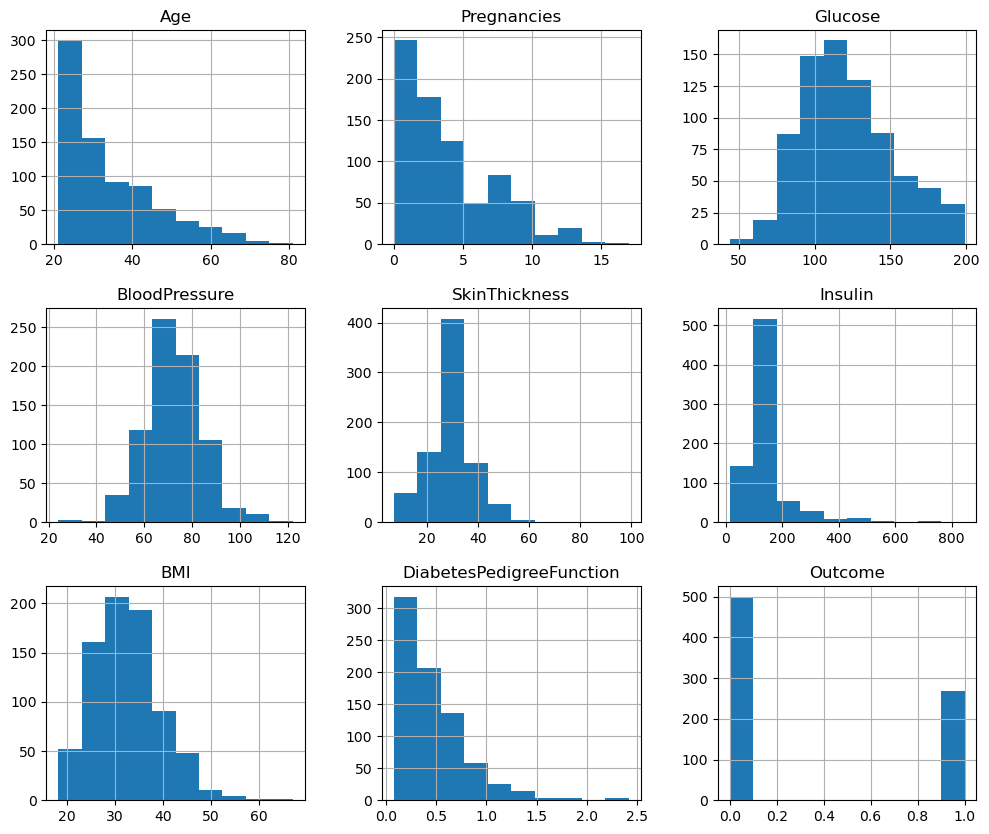

In [11]:
data.hist(figsize=(12,10))

In [12]:
data.shape

(768, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

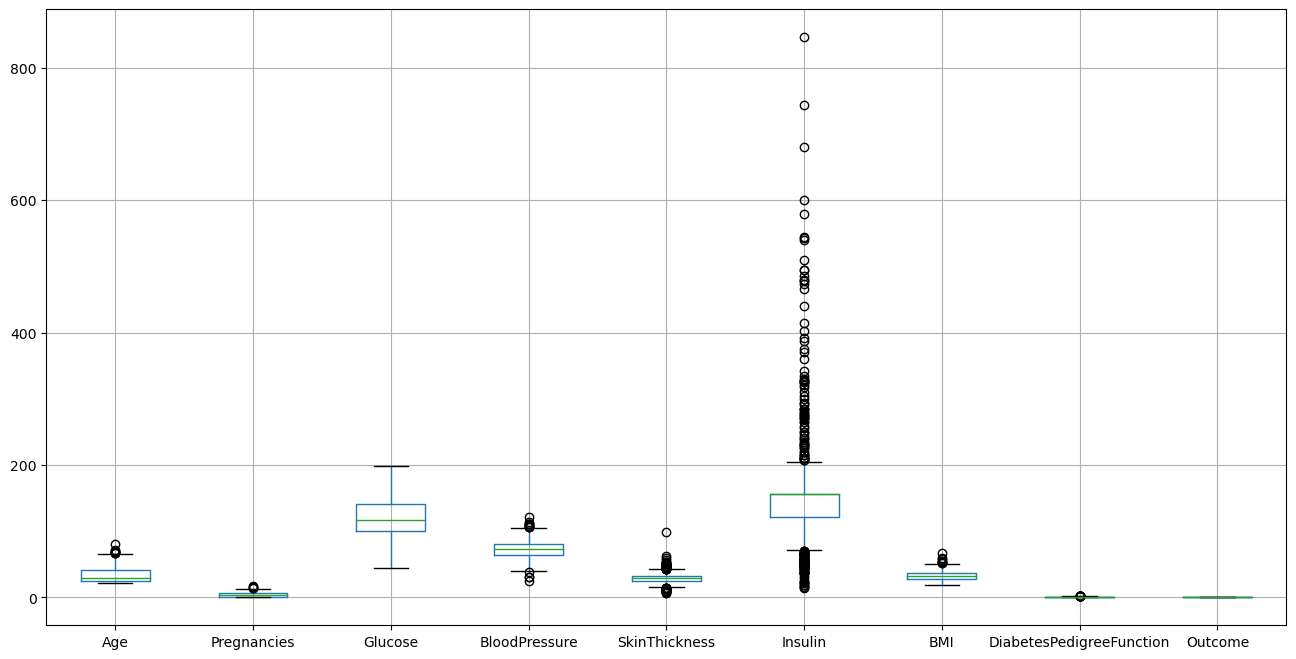

In [14]:
data.boxplot(figsize=(16,8))

<Axes: >

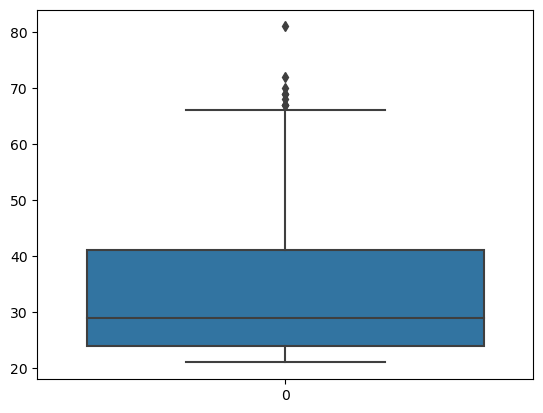

In [15]:
sns.boxplot(data['Age'])

<Axes: >

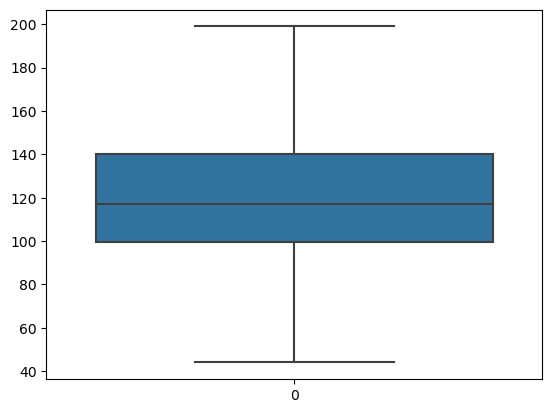

In [16]:
sns.boxplot(data['Glucose'])

<Axes: >

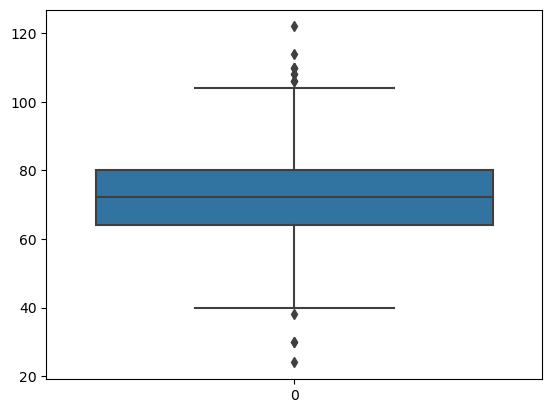

In [17]:
sns.boxplot(data['BloodPressure'])

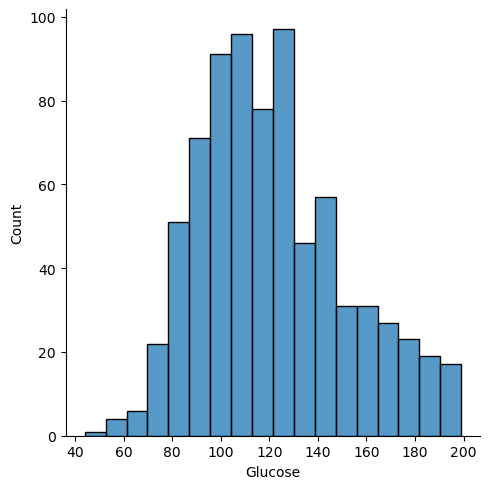

In [18]:
sns.displot(data['Glucose'])

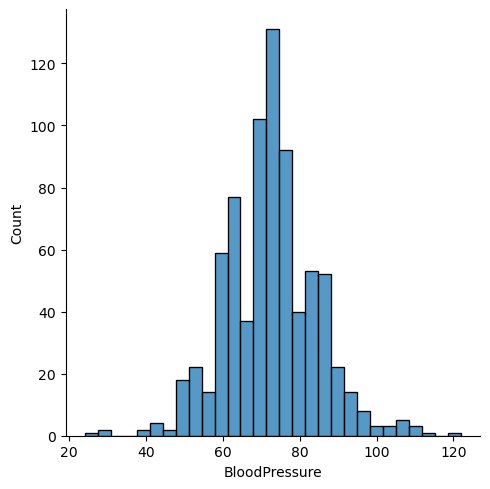

In [19]:
sns.displot(data['BloodPressure'])

<Axes: ylabel='count'>

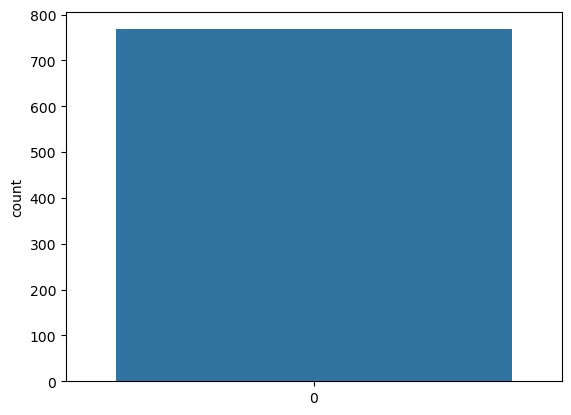

In [20]:
sns.countplot(data['Outcome'])

In [21]:
data.corr()

Age  Pregnancies   Glucose  BloodPressure  \
Age                       1.000000     0.544341  0.266534       0.324595   
Pregnancies               0.544341     1.000000  0.127911       0.208522   
Glucose                   0.266534     0.127911  1.000000       0.218367   
BloodPressure             0.324595     0.208522  0.218367       1.000000   
SkinThickness             0.127872     0.082989  0.192991       0.192816   
Insulin                   0.136734     0.056027  0.420157       0.072517   
BMI                       0.025519     0.021565  0.230941       0.281268   
DiabetesPedigreeFunction  0.033561    -0.033523  0.137060      -0.002763   
Outcome                   0.238356     0.221898  0.492928       0.166074   

                          SkinThickness   Insulin       BMI  \
Age                            0.127872  0.136734  0.025519   
Pregnancies                    0.082989  0.056027  0.021565   
Glucose                        0.192991  0.420157  0.230941   
BloodPressure                  0.192816  0.072517  0.281268   
SkinThickness                  1.000000  0.158139  0.542398   
Insulin                        0.158139  1.000000  0.166586   
BMI                            0.542398  0.166586  1.000000   
DiabetesPedigreeFunction       0.100966  0.098634  0.153400   
Outcome                        0.215299  0.214411  0.311924   

                          DiabetesPedigreeFunction   Outcome  
Age                                       0.033561  0.238356  
Pregnancies                              -0.033523  0.221898  
Glucose                                   0.137060  0.492928  
BloodPressure                            -0.002763  0.166074  
SkinThickness                             0.100966  0.215299  
Insulin                                   0.098634  0.214411  
BMI                                       0.153400  0.311924  
DiabetesPedigreeFunction                  1.000000  0.173844  
Outcome                                   0.173844  1.000000

<Axes: >

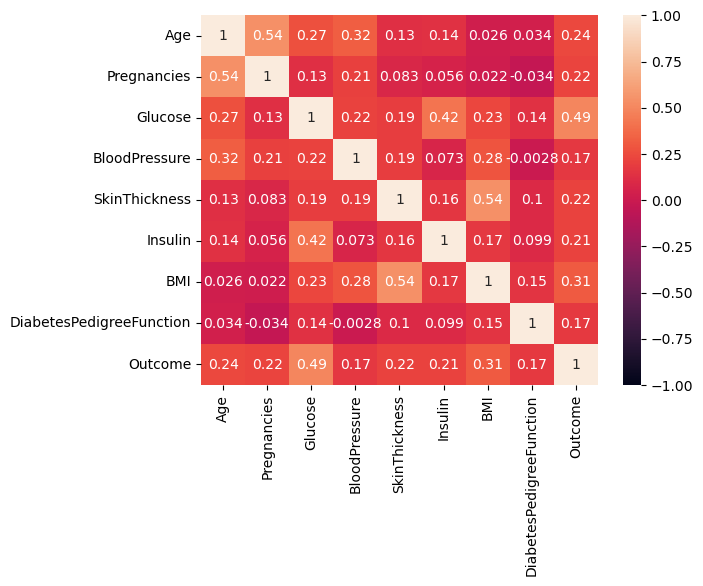

In [22]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

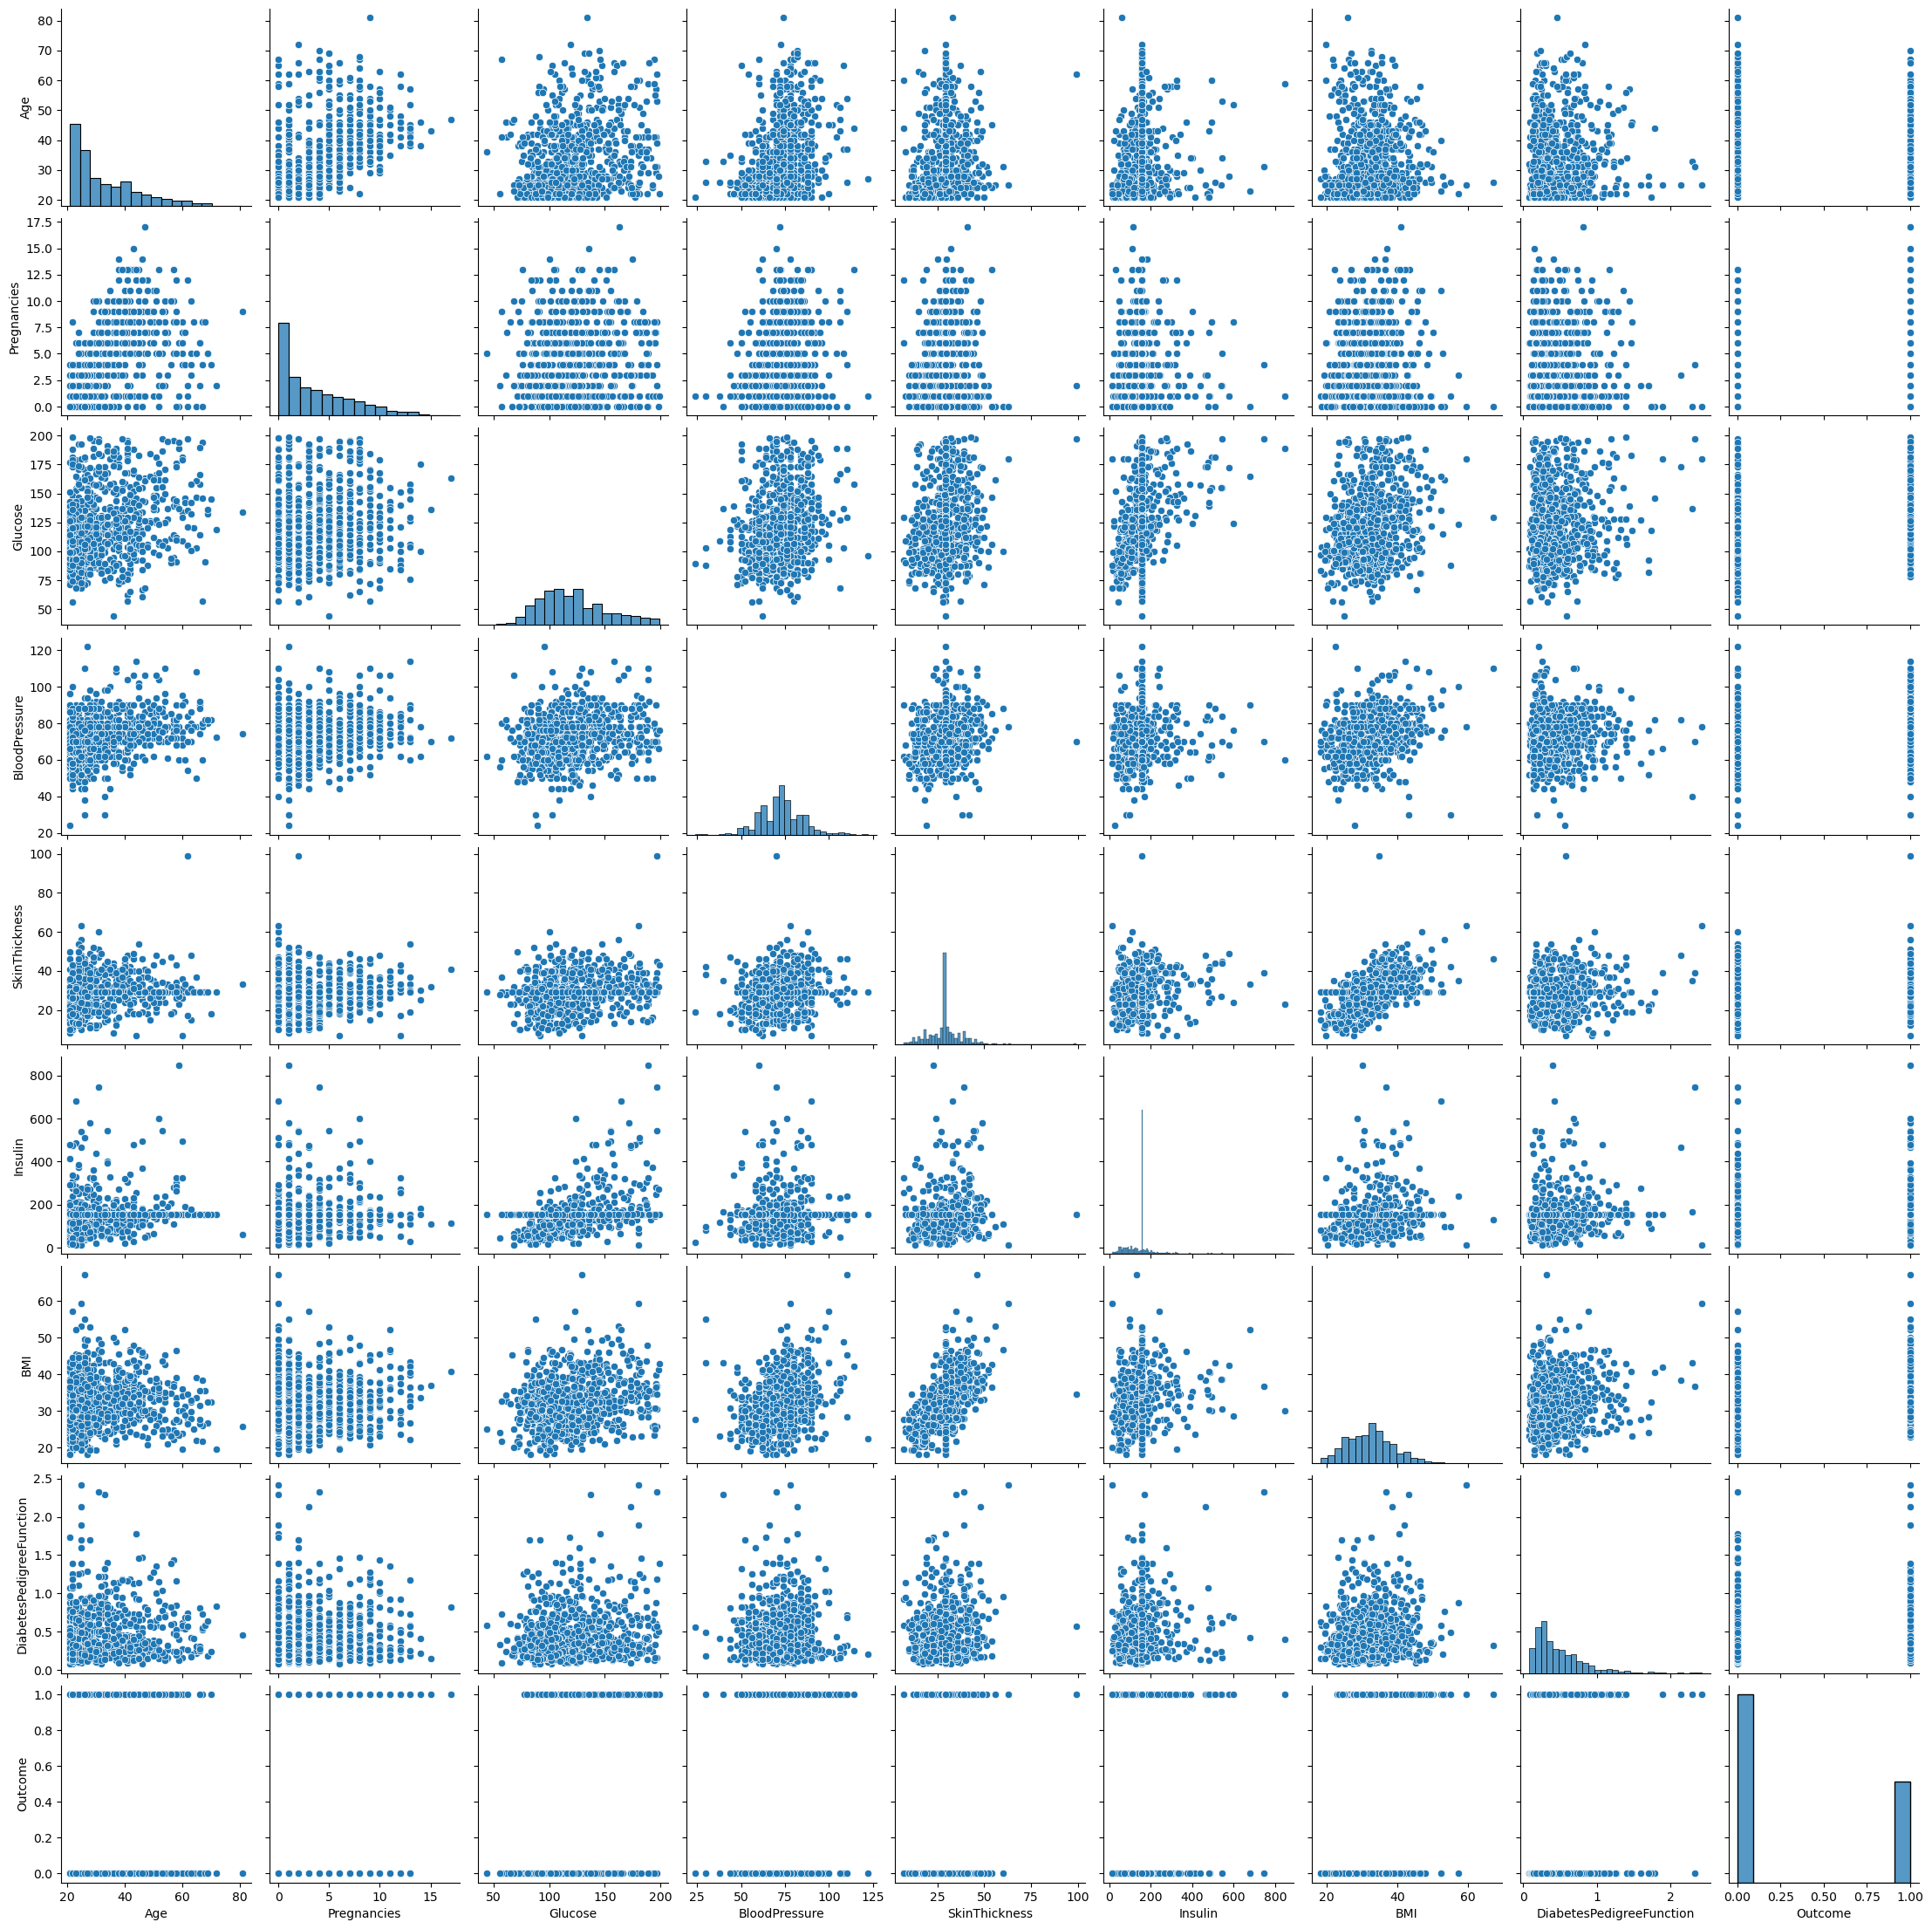

In [23]:
sns.pairplot(data)

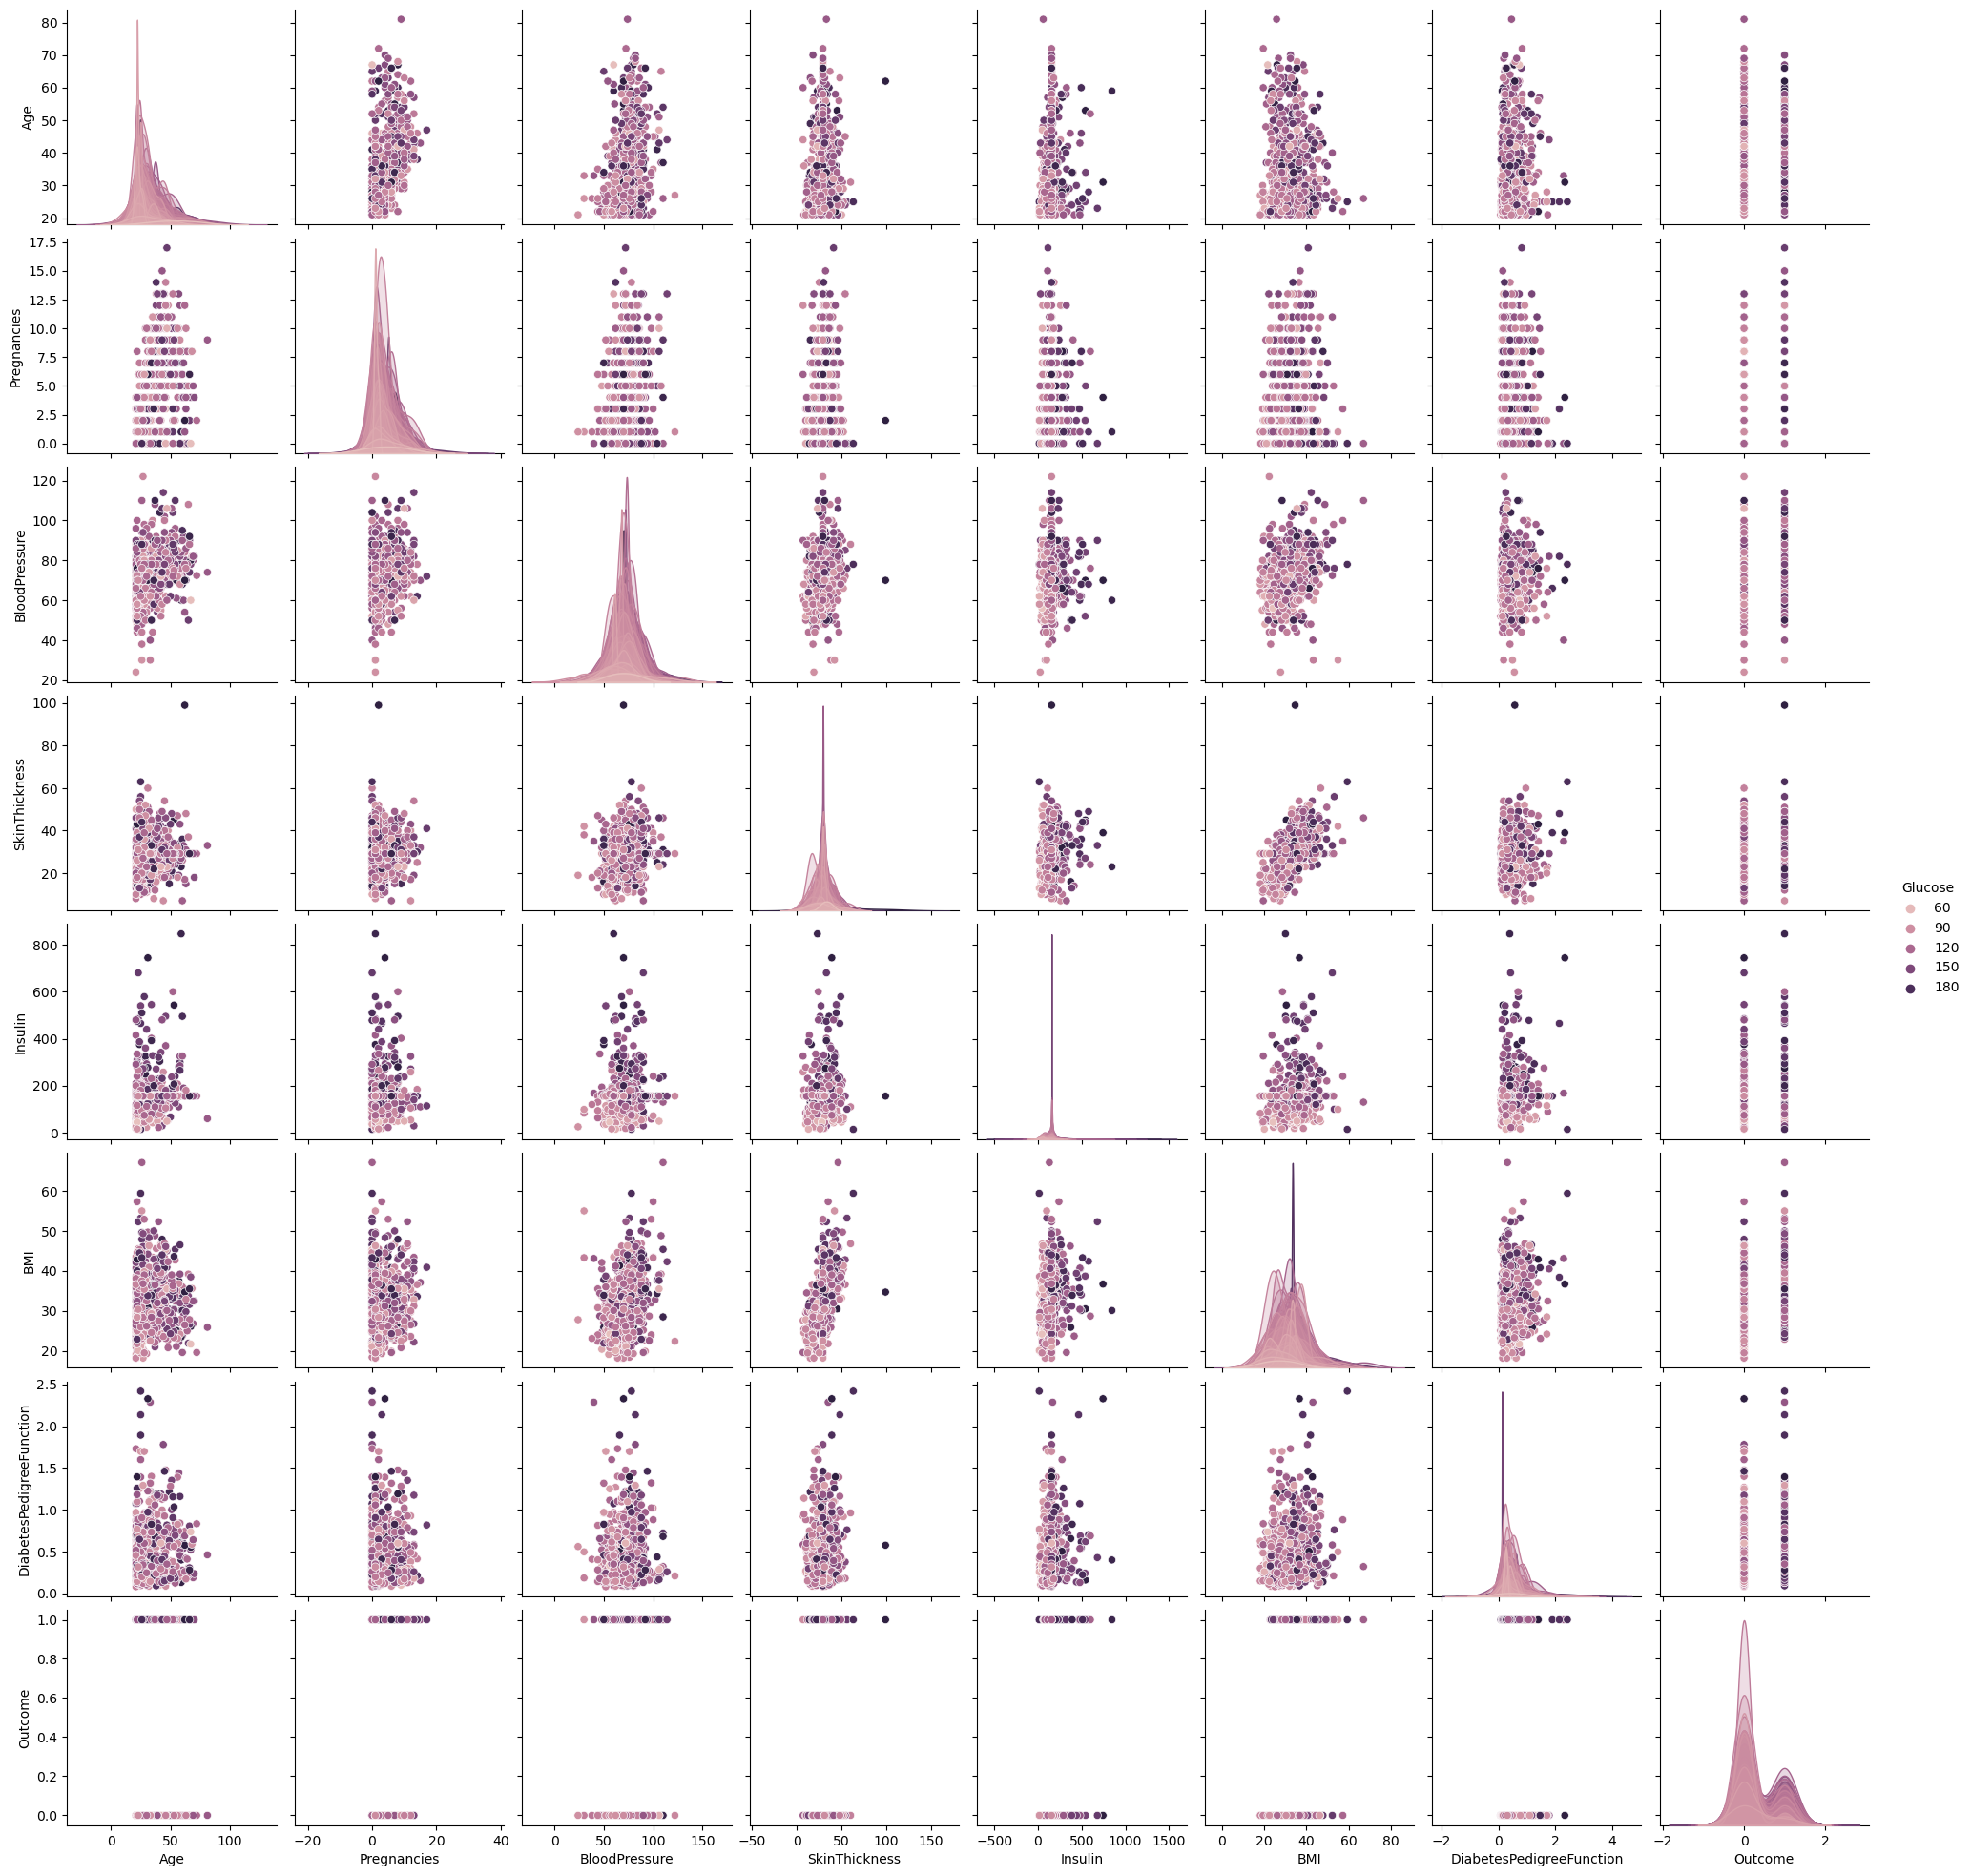

In [24]:
sns.pairplot(data,hue='Glucose')

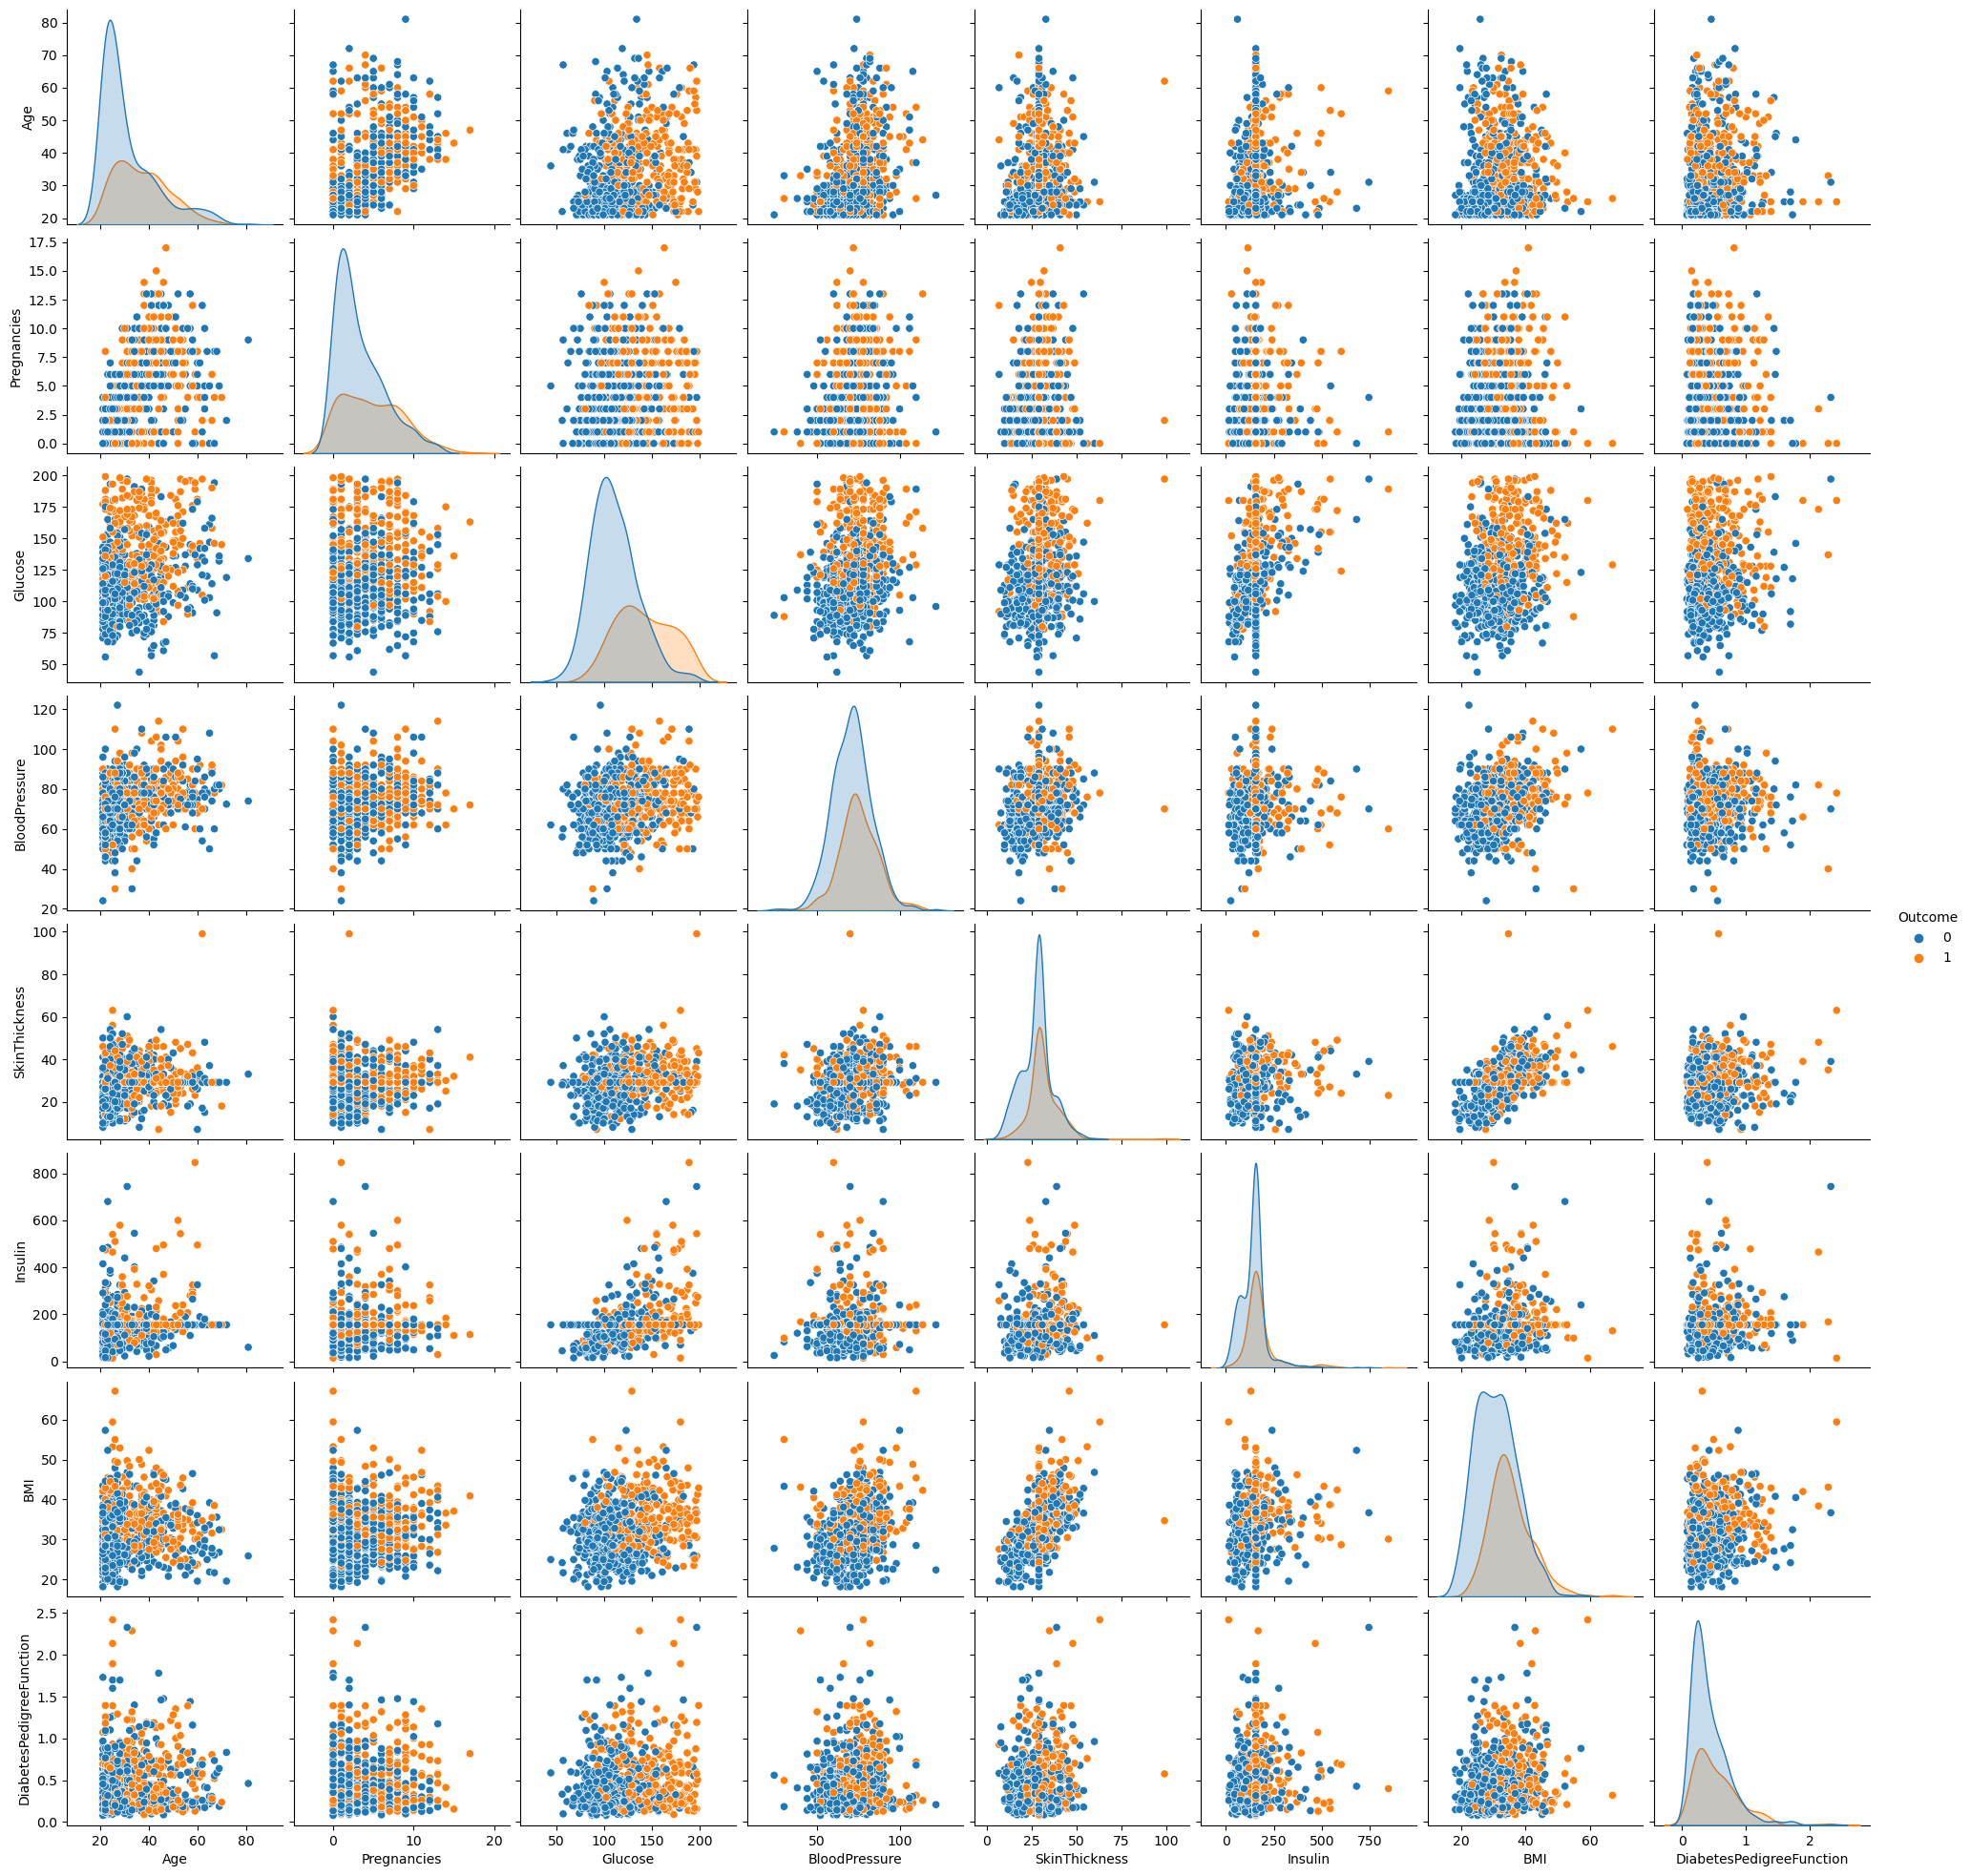

In [25]:
sns.pairplot(data,hue='Outcome')

In [26]:
data.columns

Index(['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

Skew:  0.5327186599872982

Kurtosis:  -0.259158604108936


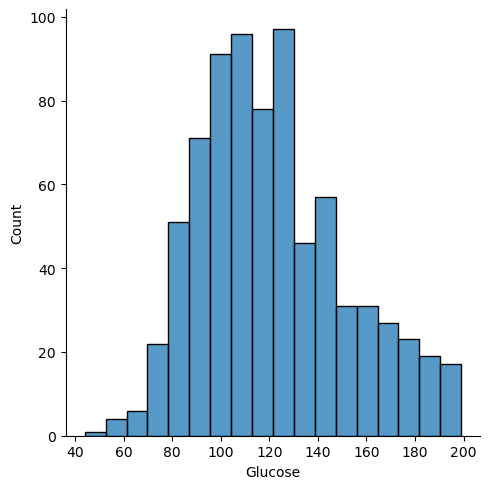

In [27]:
from scipy.stats import skew,kurtosis
print('Skew: ',data['Glucose'].skew()) #shows tail is longer/fatter on which side(if skew=+ve then tail is longer/fatter on right side,if skew=-ve then tail on graph is longer/fatter on left side, if skew=0 then it is perfectly symmetric)
print()
print('Kurtosis: ',data['Glucose'].kurtosis())#shows how heavy the tail is (if kurtosis>3 then tail is heavier ,if kurtosis<3 then tail on graph is lighter than normal distribution)
sns.displot(data['Glucose'])

Skew:  3.019083661355125

Kurtosis:  15.185232747613846


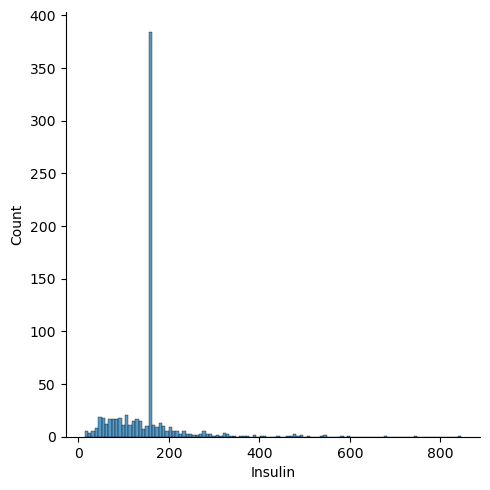

In [28]:
from scipy.stats import skew,kurtosis
print('Skew: ',data['Insulin'].skew())
print()
print('Kurtosis: ',data['Insulin'].kurtosis())
sns.displot(data['Insulin'])

# Build a Naive bayes model

In [29]:
x=data.iloc[:,:-1]
x.head(3)

Age  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0   50            6    148.0           72.0       35.00000  155.548223  33.6   
1   31            1     85.0           66.0       29.00000  155.548223  26.6   
2   32            8    183.0           64.0       29.15342  155.548223  23.3   

   DiabetesPedigreeFunction  
0                     0.627  
1                     0.351  
2                     0.672

In [32]:
x.shape

(768, 8)

In [30]:
y=data.iloc[:,-1:]
y.head(3)

Outcome
0        1
1        0
2        1

In [60]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (614, 8)

Training data-y-Shape:	 (614, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (154, 8)

Testing data(y-outcome)shape:	 (154, 1)


# Build Gaussian Naive Bayes model

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
#Train the model
gauss_nb=GaussianNB()
print('********************Gaussian NB Model**********************')
print("Training Started.......\n")
print()
gauss_nb.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=gauss_nb.predict(xtest)
print('Predicted values are: \n',ypred)
print('\nTesting is also completed....\n')

********************Gaussian NB Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted values are: 
 [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1]

Testing is also completed....



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

Accuracy Score:	 0.7467532467532467

Confusion Matrix:
 [[90 18]
 [21 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       108
           1       0.58      0.54      0.56        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.74      0.75      0.74       154



<Axes: >

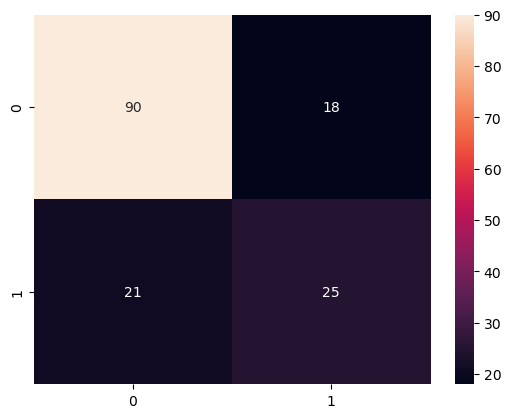

In [47]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

# Build Multinomial Naive Bayes model

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
#Train the model
multi_nb=MultinomialNB()
print('********************Multinomial NB Model**********************')
print("Training Started.......\n")
print()
multi_nb.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=multi_nb.predict(xtest)
print('Predicted values are: \n',ypred)
print('\nTesting is also completed....\n')

print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

********************Multinomial NB Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted values are: 
 [0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 0]

Testing is also completed....

Accuracy Score:	 0.6298701298701299

Confusion Matrix:
 [[73 35]
 [22 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       108
           1       0.41      0.52      0.46        46

    accuracy                           0.63       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.66      0.63      0.64       154



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

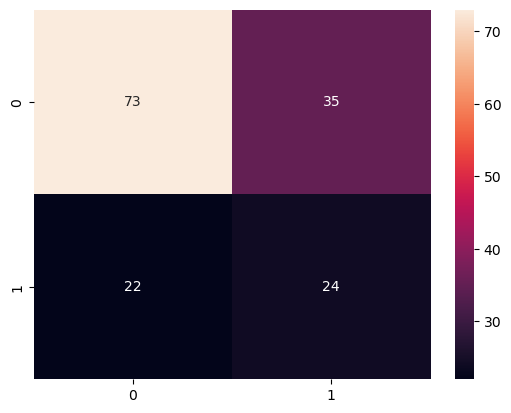

In [55]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

# Build Bernoulli  Naive Bayes model

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
#Train the model
ber_nb=BernoulliNB()
print('********************Bernoulli NB Model**********************')
print("Training Started.......\n")
print()
ber_nb.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=ber_nb.predict(xtest)
print('Predicted values are: \n',ypred)
print('\nTesting is also completed....\n')

print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

********************Bernoulli NB Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted values are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

Testing is also completed....

Accuracy Score:	 0.7012987012987013

Confusion Matrix:
 [[108   0]
 [ 46   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       108
           1       0.00      0.00      0.00        46

    accuracy                           0.70       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.49      0.70      0.58       154



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarni

<Axes: >

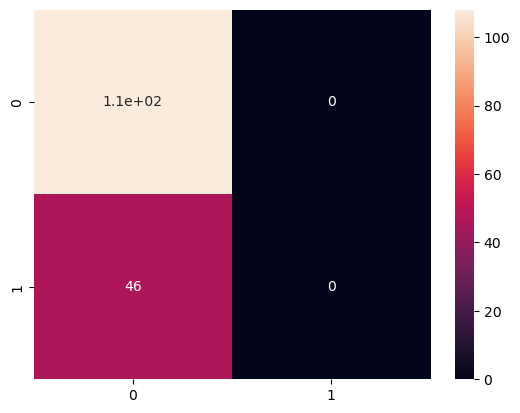

In [57]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_y=sc.fit_transform(y)

In [62]:
sc_x.shape

(768, 8)

In [63]:
sc_x[0]

array([ 1.42599540e+00,  6.39947260e-01,  8.65108070e-01, -3.35182392e-02,
        6.65502121e-01, -3.34507888e-16,  1.66291742e-01,  4.68491977e-01])

In [64]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[-9.63611220e-01, -1.12433121e+00, -5.58024714e-01, ...,
         3.10032291e-03, -1.84426162e+00, -7.21236853e-01],
       [-3.64074303e-01,  1.57464980e+00, -1.00248244e-01, ...,
         3.10032291e-03, -5.30331556e-01, -6.43343780e-01],
       [-9.63611220e-01, -2.24670877e-01,  1.66546100e+00, ...,
         3.72631894e+00,  4.47816380e-01, -6.57768423e-01],
       ...,
       [-4.49722434e-01, -8.24444435e-01,  7.17209737e-01, ...,
         3.10032291e-03,  1.26537286e+00,  3.49071664e-01],
       [-7.92314958e-01, -5.24557656e-01, -3.29136479e-01, ...,
        -1.78683667e-01,  9.87987628e-01, -8.97217499e-01],
       [-7.06666827e-01, -5.24557656e-01, -7.21516310e-01, ...,
        -1.14908851e+00,  1.14857908e+00,  5.51016667e-01]])

In [65]:
sc_train_y=sc.fit_transform(ytrain)
sc_train_y

array([[-0.7525467 ],
       [ 1.32882119],
       [ 1.32882119],
       [-0.7525467 ],
       [-0.7525467 ],
       [ 1.32882119],
       [ 1.32882119],
       [ 1.32882119],
       [ 1.32882119],
       [ 1.32882119],
       [-0.7525467 ],
       [ 1.32882119],
       [ 1.32882119],
       [-0.7525467 ],
       [-0.7525467 ],
       [ 1.32882119],
       [ 1.32882119],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [ 1.32882119],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [-0.7525467 ],
       [ 1.32882119],
       [ 1.32882119],
       [-0.7525467 ],
       [ 1.32882119],
       [-0.7525467 ],
       [ 1.32882119],
       [ 1

In [66]:
sc_train_x.shape

(614, 8)

In [67]:
sc_train_x[0]

array([-0.96361122, -1.12433121, -0.55802471, -0.36895808, -0.81748799,
        0.00310032, -1.84426162, -0.72123685])

In [68]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

array([[ 0.64696986, -0.64208234,  0.29717699, ..., -0.01278981,
         0.97554996, -0.44186805],
       [-0.84628613, -0.9303642 ,  0.66760953, ...,  0.28300783,
        -1.10845996,  1.63362581],
       [-0.09965814,  0.22276326, -1.18455317, ..., -0.01278981,
        -0.3993177 ,  3.2021288 ],
       ...,
       [ 0.64696986,  0.79932699,  2.1493397 , ..., -0.01278981,
         0.54138123, -0.23986388],
       [ 1.89134985, -0.06551861, -0.30898535, ...,  0.60963179,
         0.77293789,  3.85963258],
       [-0.51445147,  0.51104513,  1.13906913, ..., -0.20087952,
         2.07544409,  0.61568321]])

In [69]:
sc_test_x.shape

(154, 8)

In [70]:
sc_test_x[0]

array([ 0.64696986, -0.64208234,  0.29717699,  0.02550339, -0.07079686,
       -0.01278981,  0.97554996, -0.44186805])

# After Scaling-Build Gaussian NB Model

In [71]:
#Train the model
gauss_nb_sc=GaussianNB()
print('********************Gaussian NB Model**********************')
print("Training Started.......\n")
print()
gauss_nb_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=gauss_nb_sc.predict(sc_test_x)
print('Predicted values are: \n',ypred_sc)
print('\nTesting is also completed....\n')

print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************Gaussian NB Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted values are: 
 [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1]

Testing is also completed....

Accuracy Score:	 0.7402597402597403

Confusion Matrix:
 [[89 19]
 [21 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.57      0.54      0.56        46

    accuracy                           0.74       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.74      0.74      0.74       154



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
########After Scaling-Build Multinomial NB Model(It is not taking negative values of sc_train_x and displaying error)

# After Scaling-Build Bernoulli NB Model

In [73]:
#Train the model
ber_nb_sc=BernoulliNB()
print('********************Bernoulli NB Model**********************')
print("Training Started.......\n")
print()
ber_nb_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=ber_nb_sc.predict(sc_test_x)
print('Predicted values are: \n',ypred)
print('\nTesting is also completed....\n')

print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************Bernoulli NB Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted values are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

Testing is also completed....

Accuracy Score:	 0.7142857142857143

Confusion Matrix:
 [[93 15]
 [29 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       108
           1       0.53      0.37      0.44        46

    accuracy                           0.71       154
   macro avg       0.65      0.62      0.62       154
weighted avg       0.69      0.71      0.70       154



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
